In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X =  load_boston().data
Y = load_boston().target
df = pd.DataFrame(X)
X = df.as_matrix()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Splitting whole data into train and test
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=5)

In [4]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [5]:
df_train=pd.DataFrame(X_train)
df_train['price']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6
2,0.124583,-0.502419,1.072305,-0.256978,1.441946,-3.913414,0.725324,-1.075955,1.655334,1.552100,0.808078,-0.053353,-0.765646,27.5
3,-0.406208,0.839388,-0.901940,-0.256978,-1.083710,0.097426,-0.515087,1.600509,-0.411970,-0.624310,-0.860301,0.152292,-0.184576,22.2
4,0.021742,-0.502419,1.072305,-0.256978,1.398401,0.123238,0.743044,-0.605107,1.655334,1.552100,0.808078,0.365116,0.301538,17.7


In [6]:
#https://github.com/anshuak100/Implement-SGD-to-Linear-Regression-on-Boston-house-prices-dataset


W,B,iteration,lr_rate,k=np.zeros(shape=(1,13)),0,40000,0.0001,339 #intialise W and B to zero

while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,13)),0
    data=df_train
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    
    iteration-=1
    
    
print(W)
print(B)

[[-1.13391091  0.6017917  -0.53220212  0.24483492 -0.98373476  3.00010555
  -0.42841593 -2.37242865  1.33727736 -0.73240304 -2.03149505  1.01267877
  -3.27010221]]
[22.52961532]


In [7]:
#prediction on x_test#predicti 
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic_train=[]
for i in range(len(X_train)):
    val=np.dot(W,X_train[i])+B  #val= wTx+b
    y_predic_train.append(np.asscalar(val))

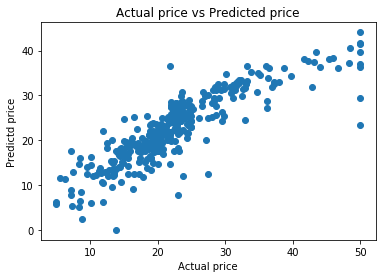

In [8]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_train,y_predic_train)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [9]:
#prediction on x_test#predicti 
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic_lr=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_predic_lr.append(np.asscalar(val))

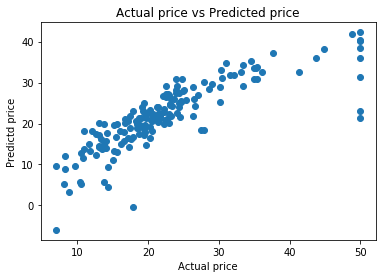

In [10]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predic_lr)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [11]:
print("Mean Squared Error Manual SGD : ",(mean_squared_error(y_test,y_predic_lr)))

Mean Squared Error Manual SGD :  29.053193388228504


In [12]:
# Implement Sklearn SGD with following parameters as used in manual SGD :
#  (1) No regularization (2) Learning_rate = 0.001 and (3) Number of iterations = 1000

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=40000, learning_rate='invscaling' , eta0=0.0001)
sgd.fit(X_train, y_train)
sklearn_sgd_predictions_train=sgd.predict(X_train)

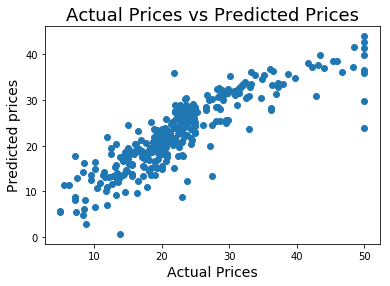

In [13]:
plt.scatter(y_train, sklearn_sgd_predictions_train)
plt.xlabel("Actual Prices",size=14)
plt.ylabel("Predicted prices",size=14)
plt.title("Actual Prices vs Predicted Prices",size=18)
plt.show()


In [14]:
sgd = SGDRegressor(penalty='none', max_iter=40000, learning_rate='invscaling' , eta0=0.0001,)
sgd.fit(X_test, y_test)

sklearn_sgd_predictions_test = sgd.predict(X_test)

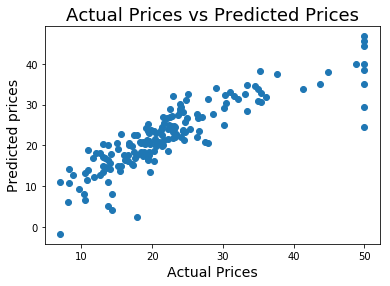

In [15]:
plt.scatter(y_test, sklearn_sgd_predictions_test)
plt.xlabel("Actual Prices",size=14)
plt.ylabel("Predicted prices",size=14)
plt.title("Actual Prices vs Predicted Prices",size=18)
plt.show()

In [16]:
print("Mean Squared Error for SGD of SKLEARN is : ",(mean_squared_error(y_test,sklearn_sgd_predictions_test)))

Mean Squared Error for SGD of SKLEARN is :  24.488406119046694


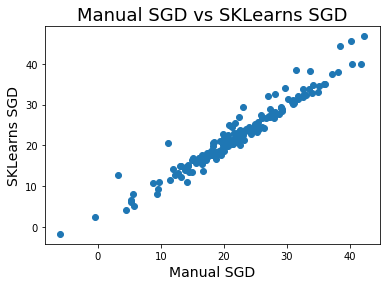

In [17]:
plt.scatter(y_predic_lr, sklearn_sgd_predictions_test)
plt.xlabel("Manual SGD",size=14)
plt.ylabel("SKLearns SGD",size=14)
plt.title("Manual SGD vs SKLearns SGD",size=18)
plt.show()

### Observation

1. we have taken boston house price dataset
2. we prepared the data for training and testing
3. we used column standardization
4. we have SGDRegressor and manual sgd regressor implemented here
5. The Scatter Plot between SGD Regressor and Manual SGD shows little difference, hence the predictions made by both of them are nearly same